# Solutions for Prerequisite exam

**Q1:** When multiplying two matrices of dimensions (n, k) and (k, m), the total number of multiplications required is n x k x m, and the total number of additions required is n x (k-1) x m.

To understand this, consider the process of calculating the (i, j)th element in the resulting matrix. This element is obtained by taking the dot product of the ith row of the first matrix and the jth column of the second matrix. For each element in the resulting matrix, we perform \( k \) multiplications (one for each pair of elements from the row and column) and \( k-1 \) additions (to sum the products).

Since there are \( n \) rows in the first matrix and \( m \) columns in the second matrix, we repeat this process for each of the \( n x m \) elements in the resulting matrix. Thus, in total, we perform n x k x m multiplications and n x (k-1) x m additions.

**Q2:**

In [1]:
import time as t
import numpy as np

n = int(input("Enter the number of rows for Matrix 1: "))
k = int(input("Enter the number of columns for Matrix 1 (and rows for Matrix 2): "))
m = int(input("Enter the number of columns for Matrix 2: "))

matrix1 = []
for i in range(n):
    row = list(eval(input(f"Enter row {i+1} of Matrix 1: ")))
    matrix1.append(row)

matrix2 = []
for i in range(k):
    row = list(eval(input(f"Enter row {i+1} of Matrix 2: ")))
    matrix2.append(row)

print("Matrix 1:")
for row in matrix1:
    print(row)

print("Matrix 2:")
for row in matrix2:
    print(row)

start_time_manual = t.time()
result_matrix = []
for i in range(n):
    result_row = []
    for j in range(m):
        cell_value = 0
        for z in range(k):
            cell_value += matrix1[i][z] * matrix2[z][j]
        result_row.append(cell_value)
    result_matrix.append(result_row)
end_time_manual = t.time()

print("Resultant Matrix (Manual Multiplication):")
for row in result_matrix:
    print(row)
print(f"Execution time (manual multiplication): {end_time_manual - start_time_manual} seconds")
matrix1_np = np.array(matrix1)
matrix2_np = np.array(matrix2)

start_time_numpy = t.time()
result_matrix_np = np.dot(matrix1_np, matrix2_np)
end_time_numpy = t.time()
print("Resultant Matrix (NumPy Multiplication):")
print(result_matrix_np)
print(f"Execution time (NumPy multiplication): {end_time_numpy - start_time_numpy} seconds")


Enter the number of rows for Matrix 1: 2
Enter the number of columns for Matrix 1 (and rows for Matrix 2): 3
Enter the number of columns for Matrix 2: 4
Enter row 1 of Matrix 1: 1,2,3
Enter row 2 of Matrix 1: 4,5,6
Enter row 1 of Matrix 2: 1,2,3,4
Enter row 2 of Matrix 2: 4,5,6,7
Enter row 3 of Matrix 2: 7,8,9,10
Matrix 1:
[1, 2, 3]
[4, 5, 6]
Matrix 2:
[1, 2, 3, 4]
[4, 5, 6, 7]
[7, 8, 9, 10]
Resultant Matrix (Manual Multiplication):
[30, 36, 42, 48]
[66, 81, 96, 111]
Execution time (manual multiplication): 0.0002753734588623047 seconds
Resultant Matrix (NumPy Multiplication):
[[ 30  36  42  48]
 [ 66  81  96 111]]
Execution time (NumPy multiplication): 9.965896606445312e-05 seconds


The execution time for matrix multiplication using NumPy arrays is shorter compared to using lists. This is because NumPy arrays utilize contiguous memory storage, meaning the data is stored in continuous blocks of memory. This allows for more efficient manipulation and faster access to the array elements. While both lists and NumPy arrays in this case are homogenous, NumPy arrays are inherently homogenous, which ensures they occupy less memory and offer faster performance than lists.

**Q3:**

In [6]:
import numpy as np
import time as t

def find_max(L):
    max_val = L[0]
    for i in L:
        if i > max_val:
            max_val = i
    return max_val

L = list(eval(input()))
n = len(L)

npL = np.array(L)
start_time_np = t.time()
median_np = np.median(npL)
end_time_np = t.time()
print(median_np, "execution time:", end_time_np - start_time_np, "seconds")

start_time_sort = t.time()
sorted_arr = np.sort(npL, kind='quicksort')
if n % 2 == 0:
    median_sort = (sorted_arr[n//2] + sorted_arr[n//2 - 1]) / 2
else:
    median_sort = sorted_arr[n//2]
end_time_sort = t.time()
print(median_sort, "execution time:", end_time_sort - start_time_sort, "seconds")

median_max = 0
start_time_max = t.time()
if n % 2 == 0:
    count = n
    while count >= n//2:
        max_val = find_max(L)
        if count == n//2 + 1:
            median_max += max_val
        if count == n//2:
            median_max += max_val
        count -= 1
        L.remove(max_val)
    median_max /= 2
else:
    count = n
    while count >= n//2 + 1:
        max_val = find_max(L)
        if count == n//2 + 1:
            median_max = max_val
        count -= 1
        L.remove(max_val)
end_time_max = t.time()
print(median_max, "execution time:", end_time_max - start_time_max, "seconds")


1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
13.0 execution time: 0.0015058517456054688 seconds
13 execution time: 0.00038433074951171875 seconds
13 execution time: 0.000423431396484375 seconds


Sorting takes O(nlog(n)) time complexcity while the method mentioned in the question takes O(n^2) time complexcity


**Q4:** The gradient of the function with respect to x and y is $(2xy + y^3cos(x))i + (x^2 + 3y^2sin(x))j$.

**Q5:**

In [8]:
import jax
import jax.numpy as jnp
import math as m

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def fun(x, y):
    return 2*x*y + y**3 * m.cos(x), x**2 + 3*y**2 * m.sin(x)

grad_f = jax.grad(f, argnums=(0, 1))
x_vals = [1.0, 2.0, 3.0, 4.0, 5.0]
y_vals = [1.0, 2.0, 3.0, 4.0, 5.0]

print("Gradient values from JAX\n")
for i in range(5):
    dx, dy = grad_f(x_vals[i], y_vals[i])
    print(f"({dx}, {dy})")

print("\nGradient values from my method\n")
for i in range(5):
    dx, dy = fun(x_vals[i], y_vals[i])
    print(f"({dx}, {dy})")


Gradient values from JAX

(2.540302276611328, 3.5244128704071045)
(4.670825004577637, 14.911568641662598)
(-8.72979736328125, 12.810239791870117)
(-9.83319091796875, -20.326519012451172)
(85.45777893066406, -46.91931915283203)

Gradient values from my method

(2.5403023058681398, 3.5244129544236893)
(4.670825307622861, 14.91156912190818)
(-8.729797408212026, 12.810240217616414)
(-9.833191735271164, -20.32651977478055)
(85.45777318290328, -46.919320599735386)


**Q6**

In [9]:
from sympy import symbols, diff, sin

x, y = symbols('x y')
function = x**2 * y + y**3 * sin(x)
gradient = (diff(function, x), diff(function, y))

print("Gradient of the function:", gradient)


Gradient of the function: (2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))


**Q7**

In [10]:
data = {}
continue_year = "y"

while continue_year == "y":
    year = int(input("Year: "))
    branches = {}
    continue_branch = "y"

    while continue_branch == "y":
        branch = input("Branch: ")
        students = {}
        continue_student = "y"

        while continue_student == "y":
            roll_no = int(input("Roll No: "))
            name = input("Name: ")
            marks = {}
            continue_subject = "y"

            while continue_subject == "y":
                subject = input("Subject: ")
                marks[subject] = float(input("Marks: "))
                continue_subject = input("Continue with subjects (y/n)? ")

            students[roll_no] = {"Roll No": roll_no, "Name": name, "Marks": marks}
            continue_student = input("Continue with students (y/n)? ")

        branches[branch] = students
        continue_branch = input("Continue with branches (y/n)? ")

    data[year] = branches
    continue_year = input("Continue with years (y/n)? ")

print(data)


Year: 2022
Branch: cse
Roll No: 260
Name: vamsi
Subject: ML
Marks: 100
Continue with subjects (y/n)? y
Subject: maths
Marks: 100
Continue with subjects (y/n)? n
Continue with students (y/n)? y
Roll No: 259
Name: rangan
Subject: vibrations
Marks: 13
Continue with subjects (y/n)? y
Subject: ML
Marks: 99
Continue with subjects (y/n)? n
Continue with students (y/n)? n
Continue with branches (y/n)? n
Continue with years (y/n)? n
{2022: {'cse': {260: {'Roll No': 260, 'Name': 'vamsi', 'Marks': {'ML': 100.0, 'maths': 100.0}}, 259: {'Roll No': 259, 'Name': 'rangan', 'Marks': {'vibrations': 13.0, 'ML': 99.0}}}}}


**Q8**

In [11]:
class SchoolClass:
    def __init__(self, classroom):
        self.classroom = classroom
        self.years = []

    class Year:
        def __init__(self, year):
            self.year = year
            self.branches = []

        class Branch:
            def __init__(self, branch):
                self.branch = branch
                self.students = []

            class Student:
                def __init__(self, name):
                    self.name = name
                    self.subjects = []

                class Subject:
                    def __init__(self, subject, marks):
                        self.subject = subject
                        self.marks = marks

classroom = SchoolClass('3rd year')
year = SchoolClass.Year('2022')
branch = SchoolClass.Year.Branch('CSE')
student = SchoolClass.Year.Branch.Student('Vamsi')
subject = SchoolClass.Year.Branch.Student.Subject('ML', 100)

student.subjects.append(subject)
branch.students.append(student)
year.branches.append(branch)
classroom.years.append(year)

print(f"Classroom: {classroom.classroom}")
print(f"Year: {year.year}")
print(f"Branch: {branch.branch}")
print(f"Student: {student.name}")
print(f"Subject: {subject.subject}, Marks: {subject.marks}")


Classroom: 3rd year
Year: 2022
Branch: CSE
Student: Vamsi
Subject: ML, Marks: 100


**Q9:**

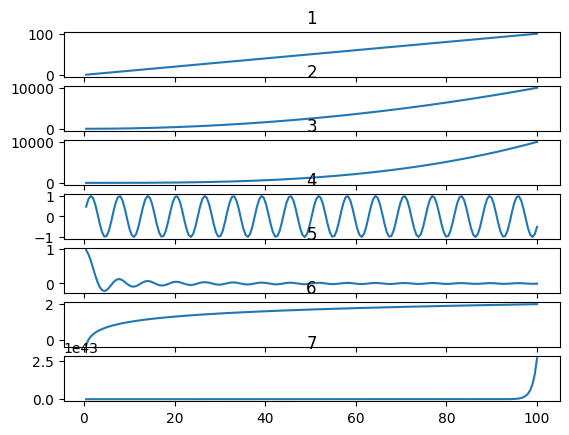

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
    return x
def f2(x):
	return x**2
def f3(x):
	return (x**3)/100
def f4(x):
	return np.sin(x)
def f5(x):
	return np.sin(x)/x
def f6(x):
	return np.log10(x)
def f7(x):
	return np.exp(x)

x = np.linspace(0.5, 100, 199)
y1 = f1(x)
y2 = f2(x)
y3 = f3(x)
y4 = f4(x)
y5 = f5(x)
y6 = f6(x)
y7 = f7(x)

fig, axs = plt.subplots(7)
axs[0].plot(x, y1)
axs[0].set_title('1')
axs[1].plot(x, y2)
axs[1].set_title('2')
axs[2].plot(x, y3)
axs[2].set_title('3')
axs[3].plot(x, y4)
axs[3].set_title('4')
axs[4].plot(x, y5)
axs[4].set_title('5')
axs[5].plot(x, y6)
axs[5].set_title('6')
axs[6].plot(x, y7)
axs[6].set_title('7')
plt.show()

**Q10:**

In [13]:
import numpy as np
import pandas as pd

arr = np.random.uniform(1, 2, (20, 5))
df = pd.DataFrame(arr, columns=['a', 'b', 'c', 'd', 'e'])

std_d = df.std()
M_col = std_d.idxmax()

mea = df.mean(axis=1)
m_row = mea.idxmin()

print(f"The column with the highest standard deviation is: {M_col}")
print(f"The row with the lowest mean is: {m_row}")


The column with the highest standard deviation is: e
The row with the lowest mean is: 4


**Q11:**

In [14]:
import numpy as np
import pandas as pd

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

n_LT8 = df[df['g'] == 'LT8'].shape[0]

st_LT8 = df[df['g'] == 'LT8']['f'].std()
st_GT8 = df[df['g'] == 'GT8']['f'].std()

print("The no: of rows where the value in the column 'g' is 'LT8': ", n_LT8)
print("The std of the col. 'f' where the value in the column 'g' is 'LT8': ", st_LT8)
print("The std of the col. 'f' where the value in the column 'g' is 'GT8': ", st_GT8)


The no: of rows where the value in the column 'g' is 'LT8':  13
The std of the col. 'f' where the value in the column 'g' is 'LT8':  0.3479708211487448
The std of the col. 'f' where the value in the column 'g' is 'GT8':  0.37962633937747964


**Q12:**

In [15]:
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6]])
y = np.array([4])
print(np.shape(x),np.shape(y))
z = x + y
print("After broadcasting y over x and the z is: \n",z)


(2, 3) (1,)
After broadcasting y over x and the z is: 
 [[ 5  6  7]
 [ 8  9 10]]


**Q13:**

In [18]:
import numpy as np

def min_arg(arr):
    mvalue = arr[0]
    mindex = 0
    for i in range(1, len(arr)):
        if arr[i] < mvalue:
            mvalue = arr[i]
            mindex = i
    return mindex

arr = list(eval(input()))
arr = np.array(arr)
m = min_arg(arr)
print("The index of minimum value is: ",m)
if np.argmin(arr) == m:
	print("verified.")
else:
	print("The code is incorrect.")

1,2,4,0,-3,-2,1,3
The index of minimum value is:  4
verified.
